In [3]:
# %%
import cv2
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import os
import cvlib as cv
import warnings

warnings.filterwarnings("ignore")

# User defined functions
import src.proprietary_functions as src

"""Image dataset source: https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html"""


# %%
# Setting filepaths
image_file = './sample_data/Img/'
annotation_file = './sample_data/Anno/'
export_file = './export'

identity_file = annotation_file + 'identity_CelebA.txt'
bbox_file = annotation_file + 'list_bbox_celeba.txt'

# Train/test split variables
random_seed = 123
test_size = 0.2
validation_size = 0.2

# Setting column names
image_id_col = 'image_id'
bbox_col_names = {
    'x_start' : 'x_1',
    'y_start' : 'y_1',
    'width' : 'width',
    'height' : 'height',
    'x_end' : '',
    'y_end' : ''}

identity_file = annotation_file + 'identity_CelebA.txt'
bbox_file = annotation_file + 'list_bbox_celeba.txt'

In [4]:
# Loading dataset metadata
identity = pd.read_csv(identity_file, sep=" ", header = None,names=['image', 'image_id'])
bbox = pd.read_csv(bbox_file, delim_whitespace=True)

#%% Filtering faces that appear at least 20 times !!!!!
labels_annot = pd.DataFrame(identity.image_id.value_counts(ascending=True)).query('image_id > 20').index.tolist()
identity_filtered = identity[identity['image_id'].isin(labels_annot)]

#%% [SPRINT 2] Train/test split of the annotations
imgs = identity_filtered['image']
labels = identity_filtered['image_id']

temp_imgs, test_imgs, _, __ = train_test_split(imgs, labels,
                                               test_size = test_size,
                                               random_state = random_seed,        
                                               stratify = labels)
train_imgs, valid_imgs, _, __ = train_test_split(temp_imgs, _,
                                               test_size = validation_size/(1-test_size),
                                               random_state = random_seed,        
                                               stratify = _)

In [5]:
# Safe train/test split

if not os.path.exists(export_file):
    os.makedirs(export_file)

if not os.path.exists(export_file + '/setting'):
    os.makedirs(export_file + '/setting')

if export_file != '':
    train_imgs.to_csv(export_file + '/setting/train_imgs.csv', index = False)
    valid_imgs.to_csv(export_file + '/setting/valid_imgs.csv', index = False)
    test_imgs.to_csv(export_file + '/setting/test_imgs.csv', index = False)

In [6]:
# [SPRINT 2] Random selection !!!!!
random.seed(random_seed)
random_pics = random.choices(identity_filtered['image'].values, k=10)
bbox_filtered = bbox[bbox['image_id'].isin(random_pics)] #generate bboxes
print(random_pics)

['010713.jpg', '017796.jpg', '082859.jpg', '021902.jpg', '182464.jpg', '007763.jpg', '108903.jpg', '067519.jpg', '172803.jpg', '032482.jpg']


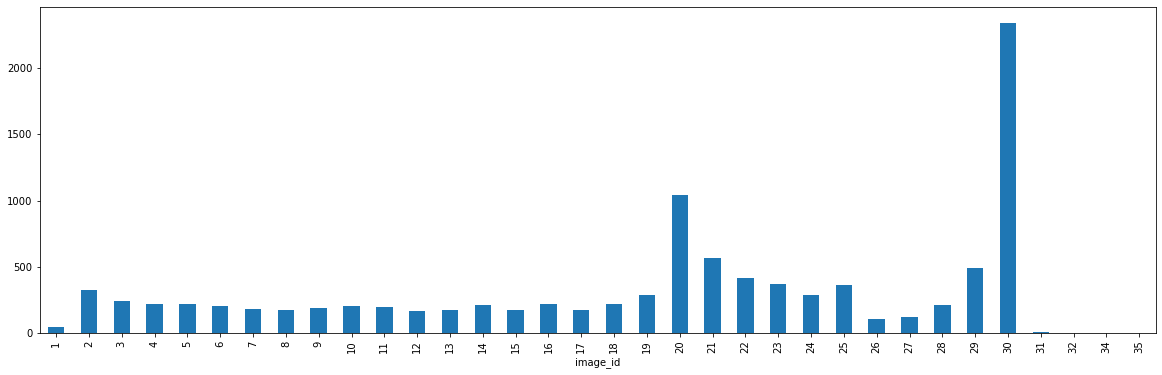

In [7]:
#Histogram
plt.figure(figsize=(20,6))
pd.DataFrame(identity.image_id.value_counts(ascending=True)).groupby('image_id').size().plot.bar()
plt.show()

In [8]:
attbs = pd.read_csv(r'C:\Users\ngnpe\OneDrive\Desktop\Agile_ML_zip\Anno\list_attr_celeba.txt', delim_whitespace=True)

In [9]:
from sklearn.metrics import matthews_corrcoef
import seaborn as sns
import numpy as np

In [15]:
def corr_atrbs(atrbs):
    dictt = {}
    atrbs_copy = atrbs.copy()

    for col in atrbs_copy.columns:
        temp = atrbs_copy.drop(col, axis = 1)

        for col2 in temp.columns:
            coef = matthews_corrcoef(atrbs_copy[col], temp[col2])
            dictt[col+'_&_'+col2] = coef
    
        atrbs_copy.drop(col, axis = 1, inplace = True)

    corr_df = pd.DataFrame([list(dictt.keys()), list(dictt.values())]).transpose().rename(columns = {0:'combos', 1:'coef'}).sort_values(by = 'coef')

    return corr_df

In [16]:
corr_df = corr_atrbs(attbs)

In [17]:
#positive associations
corr_df.query('coef > 0.3')

,combos,coef
130,Bags_Under_Eyes_&_Male,0.301077
559,Heavy_Makeup_&_Rosy_Cheeks,0.302815
507,Goatee_&_Male,0.305602
257,Big_Nose_&_Chubby,0.314317
563,Heavy_Makeup_&_Wavy_Hair,0.323303
607,Male_&_Wearing_Necktie,0.329928
634,Mustache_&_Sideburns,0.336297
554,Heavy_Makeup_&_No_Beard,0.351256
564,Heavy_Makeup_&_Wearing_Earrings,0.353107
761,Wavy_Hair_&_Wearing_Lipstick,0.359305


In [25]:
#negative associations
corr_df[corr_df['coef'] < - 0.3]

,combos,coef
605,Male_&_Wearing_Lipstick,-0.789435
550,Heavy_Makeup_&_Male,-0.666724
511,Goatee_&_No_Beard,-0.570071
665,No_Beard_&_Sideburns,-0.543061
23,5_o_Clock_Shadow_&_No_Beard,-0.526946
593,Male_&_No_Beard,-0.522243
628,Mustache_&_No_Beard,-0.452595
57,Arched_Eyebrows_&_Male,-0.408016
94,Attractive_&_Male,-0.394451
603,Male_&_Wearing_Earrings,-0.373469


In [29]:
def corr_matrix(atr_df, plot = False):

    corr_mat = pd.DataFrame(columns = atr_df.columns, index = atr_df.columns)

    for row in corr_mat.index:
        for col in corr_mat.index:
            coeff = matthews_corrcoef(atr_df[row], atr_df[col])
            corr_mat.loc[row, col] = coeff

    if plot:
        plt.figure(figsize=(20,15))
        corr_mat = corr_mat.fillna(0.0)
        mask = np.triu(np.ones_like(corr_mat))
        cax = sns.heatmap(corr_mat, vmin = -1.0, vmax = 1.0, mask = mask, cmap ='plasma')
        cax.tick_params(labelsize=10)
        plt.show()
        
    else:
        return corr_mat

In [30]:
corr_matrix(attbs)

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
5_o_Clock_Shadow,1.0,-0.158587,-0.062415,0.168488,0.005584,-0.089243,-0.043699,0.15201,0.100604,-0.132686,...,0.25937,-0.067777,0.05226,-0.12425,-0.161911,0.033997,-0.333921,-0.116239,0.097899,0.014869
Arched_Eyebrows,-0.158587,1.0,0.250599,-0.091947,-0.069524,-0.027775,0.2434,-0.084025,-0.000996,0.127009,...,-0.116001,0.093834,-0.054486,0.200835,0.294779,-0.09998,0.460409,0.220184,-0.132821,0.146798
Attractive,-0.062415,0.250599,1.0,-0.178464,-0.145826,0.059712,0.062552,-0.277064,0.00414,0.154774,...,-0.100229,0.147845,0.04155,0.214992,0.124349,-0.138636,0.480104,0.068738,-0.15642,0.387735
Bags_Under_Eyes,0.168488,-0.091947,-0.178464,1.0,0.116215,-0.057568,-0.005982,0.361604,0.002667,-0.106879,...,0.100411,0.112759,0.024208,-0.127128,-0.096969,-0.005726,-0.284052,-0.052964,0.19698,-0.230759
Bald,0.005584,-0.069524,-0.145826,0.116215,1.0,-0.064044,-0.003577,0.180148,-0.080364,-0.063056,...,0.058599,0.009402,-0.07192,-0.103482,-0.061211,-0.030625,-0.142852,-0.050445,0.176501,-0.196253
Bangs,-0.089243,-0.027775,0.059712,-0.057568,-0.064044,1.0,0.034876,-0.069395,-0.033558,0.098854,...,-0.073341,0.052469,0.020034,0.068166,0.058203,-0.079939,0.163378,0.114454,-0.092919,0.017695
Big_Lips,-0.043699,0.2434,0.062552,-0.005982,-0.003577,0.034876,1.0,0.076814,0.067191,0.023674,...,-0.039739,0.012885,-0.037144,0.12019,0.126523,-0.013286,0.195212,0.149892,-0.06777,0.107722
Big_Nose,0.15201,-0.084025,-0.277064,0.361604,0.180148,-0.069395,0.076814,1.0,0.081091,-0.158323,...,0.131667,0.100888,-0.028837,-0.131843,-0.058029,0.065552,-0.303651,-0.03593,0.205014,-0.284382
Black_Hair,0.100604,-0.000996,0.00414,0.002667,-0.080364,-0.033558,0.067191,0.081091,1.0,-0.233626,...,0.043231,-0.002533,0.112496,-0.085227,0.002348,-0.103605,-0.066856,-0.042539,0.023184,0.121372
Blond_Hair,-0.132686,0.127009,0.154774,-0.106879,-0.063056,0.098854,0.023674,-0.158323,-0.233626,1.0,...,-0.096039,0.090209,0.005458,0.1284,0.095005,-0.083373,0.281935,0.143577,-0.106377,0.052402


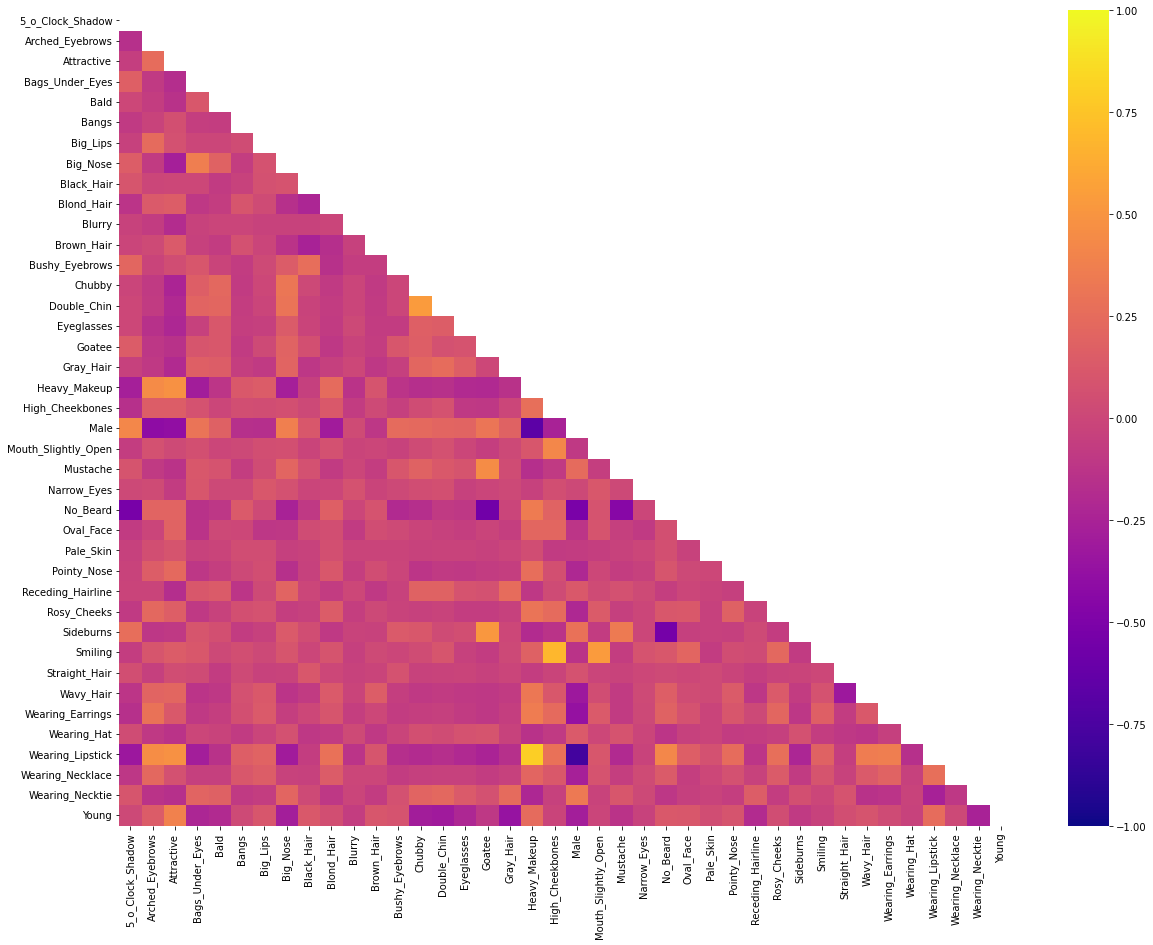

In [31]:
corr_matrix(attbs, True)

In [13]:
#relative distributions of attributes
dist_var_df = pd.DataFrame(columns = ['var', 'dist_1_rel', 'dist_0_rel'])

for col in attbs.columns:

    dist_1_rel = pd.DataFrame(attbs[col].value_counts(normalize = True)).loc[1,col]
    dist_0_rel = pd.DataFrame(attbs[col].value_counts(normalize = True)).loc[-1,col]

    dist_var_df = pd.concat((dist_var_df, pd.DataFrame([col, dist_1_rel, dist_0_rel]).transpose().rename(columns = {0:'var', 1:'dist_1_rel', 2:'dist_0_rel'})))

dist_var_df

,var,dist_1_rel,dist_0_rel
0,5_o_Clock_Shadow,0.111136,0.888864
0,Arched_Eyebrows,0.266981,0.733019
0,Attractive,0.512505,0.487495
0,Bags_Under_Eyes,0.204572,0.795428
0,Bald,0.022443,0.977557
0,Bangs,0.151575,0.848425
0,Big_Lips,0.240796,0.759204
0,Big_Nose,0.234532,0.765468
0,Black_Hair,0.239251,0.760749
0,Blond_Hair,0.147992,0.852008


In [34]:
#joining annotations with attributes
df_joined = identity_filtered.merge(attbs.reset_index().rename(columns = {'index':'image'}), on = 'image')
df_joined

,image,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,2880,-1,1,1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,2937,-1,-1,-1,1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,8692,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,5805,-1,-1,1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,9295,-1,1,1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142864,202593.jpg,10139,-1,-1,1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
142865,202594.jpg,8984,-1,1,1,-1,-1,-1,1,-1,...,-1,-1,-1,1,1,-1,1,-1,-1,1
142866,202595.jpg,9761,-1,-1,1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
142867,202596.jpg,7192,-1,-1,-1,-1,-1,1,1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1


In [78]:
def balanced_pairs(joined_df, n, atrbs):

    pairs_df = pd.DataFrame(columns = ['pic_1', 'pic_2', 'label'])

    joined_df_grouped = joined_df.groupby(atrbs)
    balanced_df = joined_df_grouped.apply(lambda x: x.sample(joined_df_grouped.size().min()).reset_index(drop=True))

    if n % 2 != 0:
        adj_list = random.sample([0, 1], k = 2)
        range_same = int(n/2) + adj_list[0]
        range_diff = int(n/2) + adj_list[1]
    else:
        range_same = n/2
        range_diff = n/2
 
    for i in range(int(range_same)):
        random_id_same = random.sample(list(balanced_df['image_id']), k = 1)
        while balanced_df.loc[balanced_df['image_id'] == random_id_same[0],'image'].shape[0] < 2:
            random_id_same = random.sample(list(balanced_df['image_id']), k = 1)
        random_same_pics = random.sample(list(balanced_df.loc[balanced_df['image_id'] == random_id_same[0],'image']), k = 2)

        hehehe = pd.DataFrame({'pic_1': [random_same_pics[0]], 'pic_2': [random_same_pics[1]], 'label':1})
        pairs_df = pd.concat((pairs_df, hehehe))

    for j in range(int(range_diff)):
        random_id_same1 = random.sample(list(balanced_df['image_id']), k = 1)
        random_id_same2 = random.sample(list(balanced_df.loc[balanced_df['image_id'] != random_id_same1[0],'image_id']), k = 1)

        random_same_pic1 = random.sample(list(balanced_df.loc[balanced_df['image_id'] == random_id_same1[0],'image']), k = 1)
        random_same_pic2 = random.sample(list(balanced_df.loc[balanced_df['image_id'] == random_id_same2[0],'image']), k = 1)

        hahaha = pd.DataFrame({'pic_1': random_same_pic1, 'pic_2': random_same_pic2, 'label': 0})
        pairs_df = pd.concat((pairs_df, hahaha))

    final_df = pairs_df.merge(joined_df[['image_id', 'image']+atrbs], left_on = 'pic_1', right_on = 'image').\
                                drop('image', axis=1).\
                            merge(joined_df[['image_id', 'image']+atrbs], left_on = 'pic_2', right_on = 'image', suffixes= ('_1', '_2')).\
                                drop('image', axis=1)

    return final_df.iloc[random.sample(list(final_df.index), final_df.shape[0]),:].reset_index(drop = True)

In [79]:
balanced_pairs(df_joined, 10, ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive'])

,pic_1,pic_2,label,image_id_1,5_o_Clock_Shadow_1,Arched_Eyebrows_1,Attractive_1,image_id_2,5_o_Clock_Shadow_2,Arched_Eyebrows_2,Attractive_2
0,174198.jpg,132877.jpg,0,767,1,-1,-1,240,-1,1,-1
1,113309.jpg,085382.jpg,1,10036,-1,1,1,10036,-1,1,1
2,066752.jpg,102644.jpg,1,4723,1,-1,-1,4723,1,1,1
3,017161.jpg,006930.jpg,0,9825,-1,-1,1,3911,1,1,1
4,090133.jpg,028220.jpg,0,2323,-1,-1,1,6662,-1,1,-1
5,188662.jpg,101457.jpg,0,8406,1,-1,-1,1890,1,1,-1
6,102866.jpg,158911.jpg,1,4164,1,-1,1,4164,-1,-1,1
7,045903.jpg,088732.jpg,0,2031,1,-1,1,8016,-1,-1,1
8,031941.jpg,005836.jpg,1,4944,1,1,-1,4944,-1,-1,-1
9,106158.jpg,112529.jpg,1,3959,1,1,1,3959,1,1,1


In [81]:
balanced_pairs(df_joined, 15, ['Wearing_Necklace', 'Straight_Hair', 'Blond_Hair'])

,pic_1,pic_2,label,image_id_1,Wearing_Necklace_1,Straight_Hair_1,Blond_Hair_1,image_id_2,Wearing_Necklace_2,Straight_Hair_2,Blond_Hair_2
0,098374.jpg,084307.jpg,1,9932,1,-1,1,9932,1,-1,1
1,084750.jpg,089407.jpg,0,5331,-1,1,1,1052,-1,-1,1
2,138131.jpg,111694.jpg,0,7641,1,1,1,973,1,-1,-1
3,166937.jpg,007793.jpg,0,393,1,1,1,5734,1,-1,1
4,111894.jpg,185649.jpg,0,7314,-1,-1,1,5226,1,-1,-1
5,108249.jpg,079470.jpg,1,10002,-1,-1,-1,10002,-1,-1,1
6,157774.jpg,147071.jpg,1,2120,1,-1,1,2120,1,-1,1
7,193741.jpg,194334.jpg,1,8771,1,-1,1,8771,1,1,1
8,174190.jpg,041234.jpg,0,2087,1,1,-1,133,1,1,-1
9,043247.jpg,041742.jpg,1,9532,-1,-1,-1,9532,-1,-1,-1
